In [1]:
import os
os.chdir('../..')

import numpy as np
import pandas as pd
import torch
import pickle
from tqdm import tqdm
from molgrad.utils import DATA_PATH

In [2]:
with open(os.path.join(DATA_PATH, 'ppb', 'data_ppb.pt'), 'rb') as handle:
    inchis, values = pickle.load(handle)

In [3]:
from rdkit.Chem.Crippen import MolLogP
from rdkit.Chem.rdMolDescriptors import CalcTPSA
from rdkit.Chem.Lipinski import NumHDonors
from rdkit.Chem.Descriptors import MolWt

from rdkit.Chem.inchi import MolFromInchi

mws = []
logps = []
tpsas = []
nhdonors = []

for inchi in inchis:
    mol = MolFromInchi(inchi)
    mws.append(MolWt(mol))
    logps.append(MolLogP(mol))
    tpsas.append(CalcTPSA(mol))
    nhdonors.append(NumHDonors(mol))

og_properties = pd.DataFrame({'mws': mws,
                              'tpsas': tpsas,
                              'logps': logps,
                              'nhdonors': nhdonors,
                              'values': values})

RDKit WARNING: [10:26:12] Enabling RDKit 2019.09.3 jupyter extensions
RDKit WARNING: [10:26:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:26:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:26:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:26:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:26:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:26:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:26:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:26:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:26:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:26:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:26:14] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [10:26:14] WARNING: not removing hy

In [4]:
og_properties

,mws,tpsas,logps,nhdonors,values
0,502.796,78.66,0.41580,6,58.00
1,254.289,87.17,2.57757,3,99.10
2,307.397,38.13,2.77920,0,50.95
3,371.827,99.60,2.45250,2,99.00
4,614.411,129.91,4.36630,3,95.00
...,...,...,...,...,...
4621,838.004,181.16,-2.15250,2,99.90
4622,356.418,54.37,4.36550,1,93.50
4623,444.440,181.62,-0.37100,6,50.00
4624,300.254,3.24,4.38160,0,96.50


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

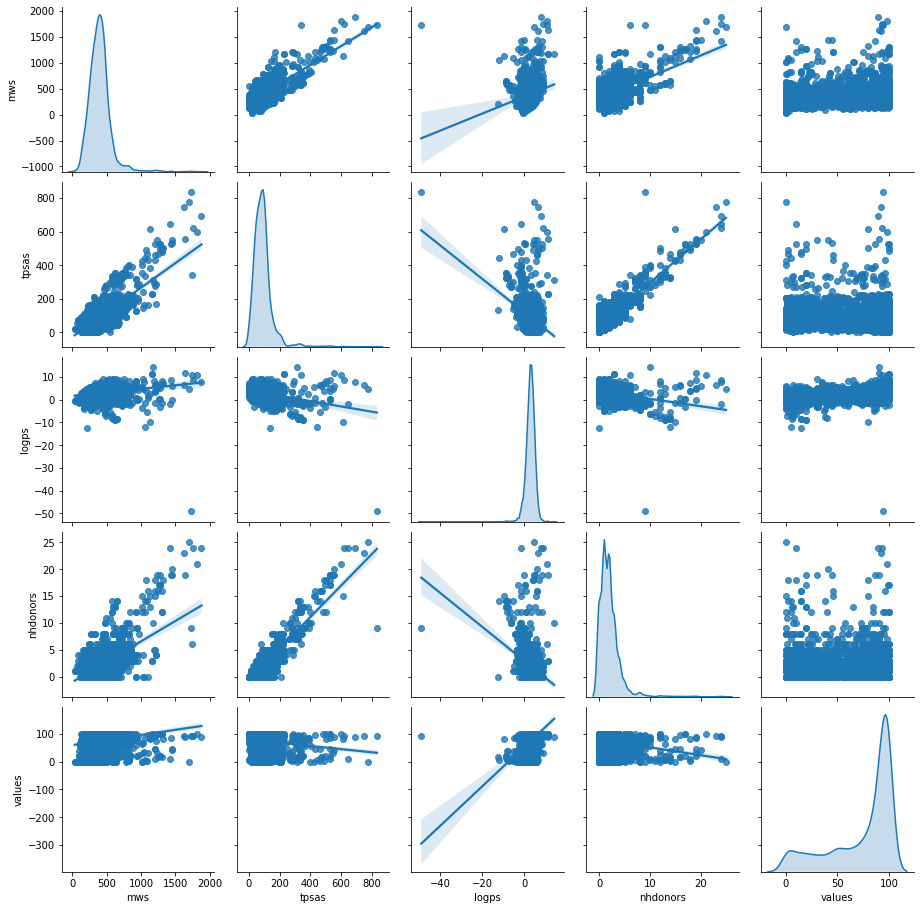

In [6]:
sns.pairplot(og_properties, diag_kind="kde", kind="reg")

In [7]:
np.corrcoef(og_properties.values.T)

array([[ 1.        ,  0.72881751,  0.22501021,  0.5595378 ,  0.18894544],
       [ 0.72881751,  1.        , -0.33932493,  0.86833711, -0.11807593],
       [ 0.22501021, -0.33932493,  1.        , -0.3192424 ,  0.5018671 ],
       [ 0.5595378 ,  0.86833711, -0.3192424 ,  1.        , -0.1977844 ],
       [ 0.18894544, -0.11807593,  0.5018671 , -0.1977844 ,  1.        ]])

In [8]:
with open(os.path.join(DATA_PATH, 'importances_scaled.pt'), 'rb') as handle:
    importances = pickle.load(handle)

In [9]:
global_importances = np.vstack(importances['ppb_global'][1]) #v2
global_importances.shape

(4626, 4)

In [10]:
global_importances = np.array(global_importances) * 100
global_importances = pd.DataFrame(data=global_importances, columns=['mws', 'tpsas', 'logps', 'nhdonors'])
global_importances['values'] = values

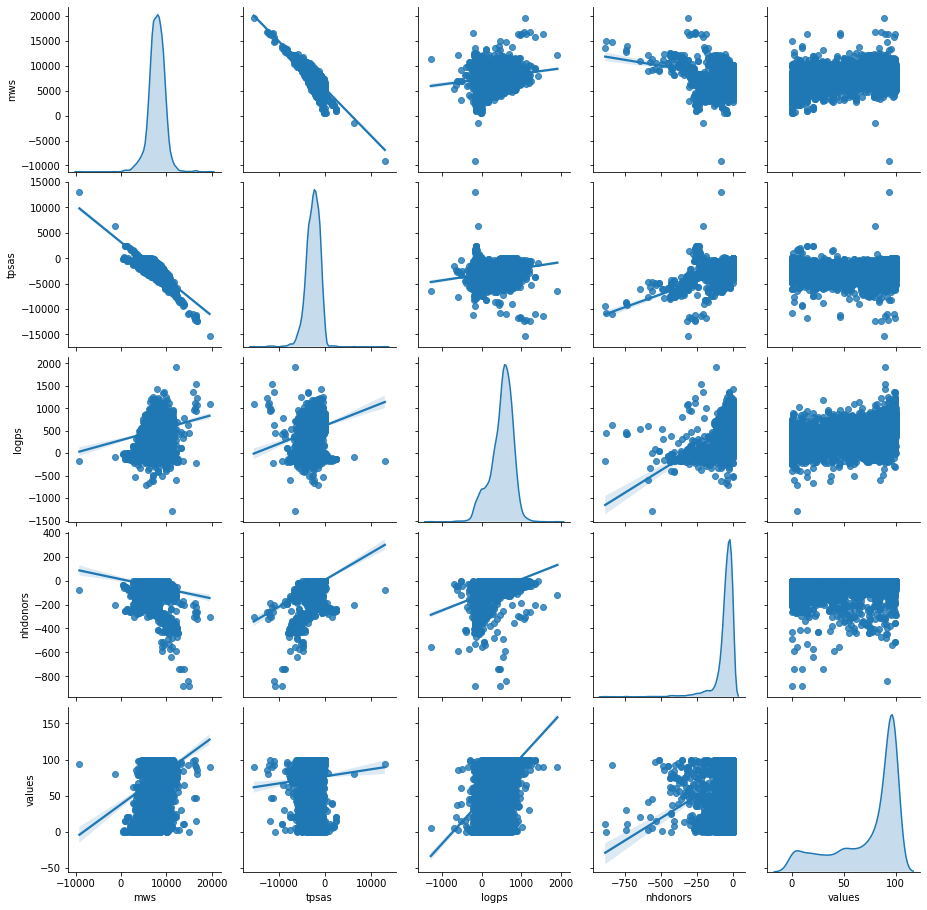

In [11]:
sns.pairplot(global_importances, diag_kind="kde", kind="reg")

In [12]:
np.corrcoef(global_importances.values.T)

array([[ 1.        , -0.83030427,  0.17327175, -0.19566048,  0.2598608 ],
       [-0.83030427,  1.        ,  0.22000405,  0.48031415,  0.04840681],
       [ 0.17327175,  0.22000405,  1.        ,  0.51090971,  0.54680158],
       [-0.19566048,  0.48031415,  0.51090971,  1.        ,  0.28846956],
       [ 0.2598608 ,  0.04840681,  0.54680158,  0.28846956,  1.        ]])